## Exploring Tokopedia E-Commerce Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [7]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [8]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [9]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [10]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [11]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [12]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [14]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [15]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [16]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [17]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int',
                "discount_amount":'int',
                "after_discount":'int',
                "base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [18]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [19]:
prizedata = pd.DataFrame(
    df[(df['is_valid']==1) &
       (df['category']=='Mobiles & Tablets') &
       ((df['order_date']>='2022-01-01') & (df['order_date']<='2022-12-31'))]
    .groupby(['sku_name'])['qty_ordered'].sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index(name='qty_total_2022')
)
# show the final output
prizedata

,sku_name,qty_total_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10


<Axes: title={'center': 'Top 5 Products'}, xlabel='Products', ylabel='2022_Quantity'>

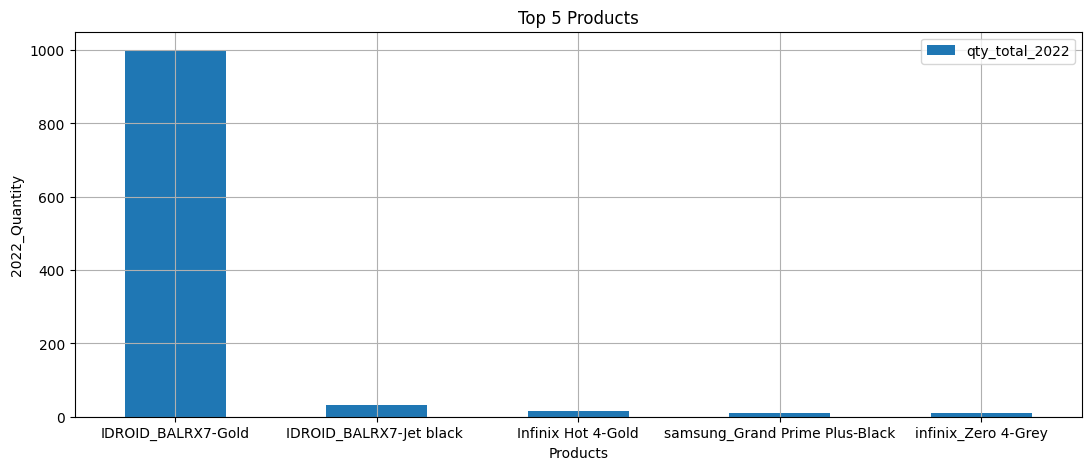

In [22]:
# sort the data to make the diagram
prizedata.sort_values(
    by=['qty_total_2022'],
    ascending=False,
    inplace=True
)

# how to make the chart
prizedata.plot(
    x='sku_name',
    y=['qty_total_2022'],
    kind='bar',
    grid = True,
    xlabel = 'Products',
    ylabel = '2022_Quantity',
    figsize=(13,5),
    rot = 0,
    title = 'Top 5 Products',
    table = False,
    secondary_y = False
  )

**INSIGHT No. 1**

Berdasarkan data yang dihasilkan, TOP 5 Produk dari kategori Mobiles & Gadgets dengan kuantitas penjualan terbanyak selama 2022 ialah IDROID_BALRX7-Gold dengan 1000 unit terjual dan diikuti IDROID_BALRX7-Jet black	dengan 31 unit terjual,  Infinix Hot 4-Gold dengan 15 unit terjual, samsung_Grand Prime Plus-Black dengan 11 unit terjual, dan 	infinix_Zero 4-Grey.

Dikarenakan IDROID_BALRX7-Gold memiliki jumlah unit terjual yang secara signifikan jauh lebih banyak dibanding 4 produk berikutnya, maka dapat disimpulkan bahwa produk IDROID_BALRX7-Gold dapat dijadikan hadiah untuk pemenang kompetisi Festival Akhir Tahun.

## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [23]:
# to filter data by is_valid = 1 and show only those data in 2021 & 2022
data_2022 = df[(df['is_valid']==1) & (df['order_date'].dt.year==2022)]
data_2021 = df[(df['is_valid']==1) & (df['order_date'].dt.year==2021)]

# group the data by category and order the data by sum of qty_ordered
data_2022_gb = data_2022.groupby(['category'])['qty_ordered'].sum()
data_2021_gb = data_2021.groupby(['category'])['qty_ordered'].sum()

# data 2021 to 2022 v.2
data2_merge = pd.merge(data_2022_gb, data_2021_gb, how='outer', on='category', suffixes=('_2022','_2021'))
data2_merge.sort_values(by=['category'],ascending=True)

# sales progress from 2021 to 2022
data2_merge['sales_progress'] = data2_merge['qty_ordered_2022'] - data2_merge['qty_ordered_2021']

# sales progress status 2021 to 2022
def sales_status(status):
  if status > 0:
    return "Increased"
  elif status < 0:
    return "Decreased"
  else:
    return "Stagnant"

# applying sales progress status
data2_merge['status'] = data2_merge['sales_progress'].apply(sales_status)

# sort the 15 categories by its sales progress from smallest to largest
data2_sort = data2_merge.sort_values(by=['sales_progress'],ascending=True)

# show the data
data2_sort


,qty_ordered_2022,qty_ordered_2021,sales_progress,status
category,,,,
Others,263,426,-163,Decreased
Soghaat,612,759,-147,Decreased
Men Fashion,175,237,-62,Decreased
Beauty & Grooming,153,168,-15,Decreased
Appliances,148,124,24,Increased
Books,195,171,24,Increased
Health & Sports,200,173,27,Increased
Computing,153,109,44,Increased
School & Education,237,184,53,Increased


<function matplotlib.pyplot.show(close=None, block=None)>

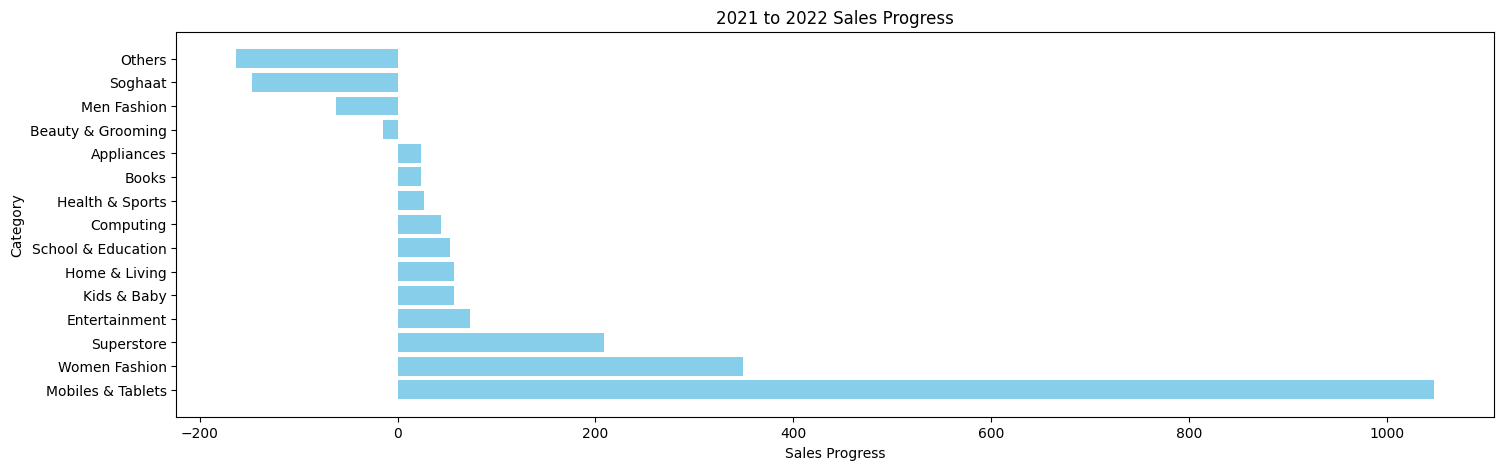

In [34]:
# how to make the chart to make a better insight
plt.figure(figsize=(17,5))
plt.barh(data2_sort.index, data2_sort['sales_progress'], color='skyblue')
plt.xlabel('Sales Progress')
plt.ylabel('Category')
plt.title('2021 to 2022 Sales Progress')
plt.gca().invert_yaxis()
plt.show

**INSIGHT No. 2.1**

Dari data yang dihasilkan, dapat disimpulkan bahwa penjualan produk kategori Others mengalami penurunan pada tahun 2022 dibanding tahun 2021. Kategori lainnya yang mengalami penurunan pada periode yang sama ialah Soghaat, Mens Fashion, dan Beauty & Grooming.

11 kategori lainnya pada periode yang sama yang mengalami kenaikan penjualan ialah Books, Appliances, Health & Sports, Computing, School & Education, Home & Living, Kids & Baby, Entertainment, Superstore, Women Fashion, serta Mobiles & Gaming.

## `Jawaban No 2.2`

In [35]:
# to filter data by Others category from is_valid = 1 data in 2021 & 2022
others_2021 = data_2021[data_2021['category']=='Others']
others_2022 = data_2022[data_2022['category']=='Others']

# group the data by sku_name and order the data by sum of qty_ordered
others_2021_gb = others_2021.groupby(['sku_name'])['qty_ordered'].sum()
others_2022_gb = others_2022.groupby(['sku_name'])['qty_ordered'].sum()

# data quantity kategori Others 2021 to 2022 v.2
others2_merge = pd.merge(others_2021_gb, others_2022_gb, how='outer', on='sku_name', suffixes=('_2021','_2022'))
others2_merge.fillna(0, inplace=True)

# Others category sales progress 2021 to 2022
others2_merge['sales_progress']=others2_merge['qty_ordered_2022']-others2_merge['qty_ordered_2021']

# sales progress status 2021 to 2022
def sales_status(status):
  if status > 0:
    return "Increased"
  elif status < 0:
    return "Decreased"
  else:
    return "Stagnant"

# applying sales progress status
others2_merge['status'] = others2_merge['sales_progress'].apply(sales_status)

# sort the 20 products by its sales progress from smallest to largest
others2_sort = others2_merge.sort_values(by='sales_progress',ascending=True).head(20)

# show the data
others2_sort


,qty_ordered_2021,qty_ordered_2022,sales_progress,status
sku_name,,,,
RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0,Decreased
Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0,Decreased
Telemall_MM-DR-HB-L,23.0,2.0,-21.0,Decreased
iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0,Decreased
RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0,Decreased
kansai_NeverWet,10.0,1.0,-9.0,Decreased
sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0,Decreased
emart_00-1,7.0,1.0,-6.0,Decreased
Vouch 365 2016,5.0,0.0,-5.0,Decreased


In [37]:
# data summary for insight
worst20_status_count = others2_sort['qty_ordered_2022'].value_counts()

# show the summary
worst20_status_count

,count
qty_ordered_2022,
0.0,15
1.0,3
45.0,1
2.0,1


**INSIGHT 2.2**

Dari data yang dihasilkan dapat ketahui terdapat 20 produk dari kategori Others dengan progress penjualan 2021 ke 2022 paling kecil. Dari data tersebut, RB_Dettol Germ Busting Kit-bf menjadi produk dengan penurunan terendah yaitu -155. Dan jika diperhatikan lebih lanjut, tidak terdapat penjualan sama sekali pada 15 dari 20 produk tersebut di tahun 2022.

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [38]:
data_promo = df[
    (df['is_gross']==1) & # to include the is_gross data into the filter
    (df['is_valid']==0) & # to exclude the is_valid data out of the filter
    (df['is_net']==0) & # to exclude the is_valid data out of the filter
    ((df['order_date']>='2022-01-01') & (df['order_date']<='2022-12-31')) # to show only the data in 2022
]

cust_promo_data = data_promo[['customer_id','registered_date']].drop_duplicates() # to clean the data from duplicates

# show the result
cust_promo_data

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [39]:
# run this code to download the file
from google.colab import files
cust_promo_data.to_csv('promo_target_cust.csv', encoding = 'utf-8-sig',index=False)
files.download('promo_target_cust.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**INSIGHT No. 3**

Dari data yang dihasilkan, dapat disimpulkan bahwa terdapat 820 pelanggan yang dapat diberikan informasi promo oleh Tim Digital Marketing.

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [40]:
# how to make additional columns for day, month, and month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month

# weekend daily sales data per month in Q42022
weekend_daily = pd.DataFrame(df[(df['is_valid']==1) & # filter the data by is_valid = 1
                               (df['day'].isin(['Saturday','Sunday'])) & # filter the day data to only in Saturday & Sunday
                               (df['order_date']>='2022-10-01') & (df['order_date']<='2022-12-31')] # to show only Q4 2022 data
                            .groupby(by=['month_num','month','order_date','day'])['before_discount'].sum() # group the data then order the data by the sum of before_discount
                            .round() # round the numerical data
                            .sort_values(ascending=False) # order the data from the largest to the smallest
                            .reset_index(name='weekend_daily_sum') # rename the column to weekend_avg
                            )
# show the data
weekend_daily

,month_num,month,order_date,day,weekend_daily_sum
0,10,October,2022-10-01,Saturday,7603220
1,10,October,2022-10-08,Saturday,7288454
2,11,November,2022-11-05,Saturday,6545822
3,12,December,2022-12-04,Sunday,6090754
4,11,November,2022-11-06,Sunday,5002268
5,10,October,2022-10-02,Sunday,2233348
6,12,December,2022-12-03,Saturday,2121234


In [41]:
# weekend sales avg per month
avg_weekend_sales = weekend_daily.groupby(by=['month_num','month',])['weekend_daily_sum'].mean().round().sort_values(ascending=True).reset_index(name='weekend_avg')

# show the data
avg_weekend_sales

,month_num,month,weekend_avg
0,12,December,4105994.0
1,10,October,5708341.0
2,11,November,5774045.0


In [42]:
# weekdays daily sales data per month in Q42022
weekdays_daily = pd.DataFrame(df[(df['is_valid']==1) & # filter the data by is_valid = 1
                               (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])) & # filter the day data to only in MOnday, Tuesday, Wednesday, Thursday, & Friday
                               (df['order_date']>='2022-10-01') & (df['order_date']<='2022-12-31')] # to show only Q4 2022 data
                            .groupby(by=['month_num','month','order_date','day'])['before_discount'].sum() # group the data then  order the data by the sum of before_discount
                            .round() # round the numerical data
                            .sort_values(ascending=False) # order the data from the largest to the smallest
                            .reset_index(name='weekdays_daily_sum') # rename the column to weekend_avg
                            )
# show the data
weekdays_daily

,month_num,month,order_date,day,weekdays_daily_sum
0,12,December,2022-12-08,Thursday,18944308
1,10,October,2022-10-04,Tuesday,12259634
2,11,November,2022-11-04,Friday,11829274
3,10,October,2022-10-05,Wednesday,10050704
4,12,December,2022-12-06,Tuesday,9767606
5,11,November,2022-11-01,Tuesday,8999106
6,12,December,2022-12-01,Thursday,8811882
7,12,December,2022-12-07,Wednesday,8352754
8,10,October,2022-10-07,Friday,7889218
9,11,November,2022-11-08,Tuesday,7614820


In [43]:
# weekdays sales avg per month
avg_weekdays_sales = weekdays_daily.groupby(by=['month_num','month',])['weekdays_daily_sum'].mean().round().sort_values(ascending=True).reset_index(name='weekdays_avg')

# show the data
avg_weekdays_sales

,month_num,month,weekdays_avg
0,11,November,6204666.0
1,10,October,7872212.0
2,12,December,8542530.0


In [44]:
# to show the merge of weekend vs weekdays per month Q4 2022 data
per_month_avg = avg_weekend_sales.merge(avg_weekdays_sales, left_on='month', right_on='month')
per_month_avg.sort_values(by='month_num_x', ascending=True, inplace=True)

#final output
per_month_avg = per_month_avg[['month', 'weekend_avg', 'weekdays_avg']]
per_month_avg_progress = per_month_avg

#progress sum
per_month_avg_progress['progress_avg'] = per_month_avg_progress['weekend_avg'] - per_month_avg_progress['weekdays_avg']
per_month_avg_progress['progress_avg_%'] = round(per_month_avg_progress['progress_avg']/per_month_avg_progress['weekend_avg']*100)

# show the final output
per_month_avg_progress

,month,weekend_avg,weekdays_avg,progress_avg,progress_avg_%
1,October,5708341.0,7872212.0,-2163871.0,-38.0
2,November,5774045.0,6204666.0,-430621.0,-7.0
0,December,4105994.0,8542530.0,-4436536.0,-108.0


<Axes: title={'center': 'Q42022 Monthly Sales Avg'}, xlabel='Month', ylabel='Progress/Month'>

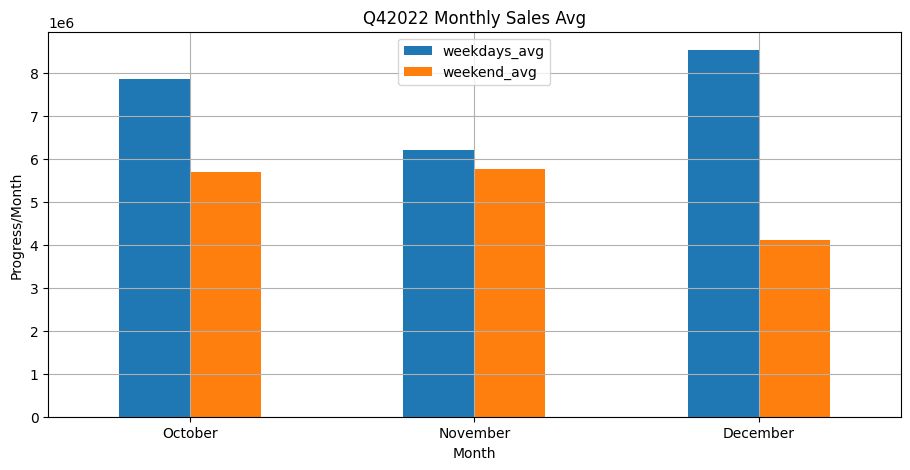

In [45]:
# how to make the chart to show better insight
per_month_avg_progress.plot(
    x='month',
    y=['weekdays_avg','weekend_avg'],
    kind='bar',
    grid = True,
    xlabel = 'Month',
    ylabel = 'Progress/Month',
    figsize=(11,5),
    rot = 0,
    title = 'Q42022 Monthly Sales Avg',
    table = False,
    secondary_y = False
  )

**INSIGHT No. 4.1**

Dari data yang dihasilkan, dapat diketahui bahwa pada masing-masing bulan di Q4 2022 terdapat penurunan rata-rata penjualan harian (*before_discount*).

Namun bila diperhatikan lebih lanjut, penurunan tersebut paling tinggi terjadi di bulan Desember 2022 yaitu sebesar 4.436.536,0 atau 108% pada Desember. Penurunan tersebut jauh lebih tinggi dibanding 2 bulan sebelumnya pada kuartal yang sama. Dengan demikian, campaign yang dilakukan setiap hari Sabtu dan Minggu di bulan Desember 2022 tidak memberikan dampak pada peningkatan penjualan (*before-discount*) rata-rata di *weekends* bulan Desember 2022.

Penurunan pada paling rendah terjadi di bulan November 2022 yaitu sebesar 430.621,0 atau 7%. Penurunan tersebut jauh lebih rendah dibanding 2 bulan lainnya kuartal yang sama. Walau jauh lebih rendah, dikarenakan tetap penurunan, maka campaign yang dilakukan setiap hari Sabtu dan Minggu di bulan November 2022 tidak memberikan dampak pada peningkatan penjualan (*before-discount*) rata-rata di *weekends* bulan November 2022.

## `Jawaban No 4.2`

In [46]:
# final output
Q42022_avg =  {'Period':'Q4_2022',
               'Weekend_Avg': round(weekend_daily['weekend_daily_sum'].mean(),1),
               'Weekdays_Avg': round(weekdays_daily['weekdays_daily_sum'].mean(),1),
               'Progress_Avg': round(weekend_daily['weekend_daily_sum'].mean() - weekdays_daily['weekdays_daily_sum'].mean(),1),
               'Progress_Avg_%': round(((weekend_daily['weekend_daily_sum'].mean() - weekdays_daily['weekdays_daily_sum'].mean())/weekend_daily['weekend_daily_sum'].mean())*100,1)
               }

# show the output
pd.DataFrame(data=Q42022_avg, index=[0])

,Period,Weekend_Avg,Weekdays_Avg,Progress_Avg,Progress_Avg_%
0,Q4_2022,5269300.0,7520249.3,-2250949.3,-42.7


**INSIGHT No. 4.2**

Dari data yang dihasilkan, dapat diketahui bahwa terdapat penurunan rata-rata penjualan (*before_discount*) harian pada keseluruhan weekend Q4 2022 dibanding keseluruhan weekdays Q4 2022 yaitu sebesar 2.250.949,3 atau 42.7%. Dengan demikian, dapat disimpulkan bahwa campaign yang dilakukan setiap hari Sabtu dan Minggu di Q4 2022 tidak memberikan dampak pada kenaikan rata-rata penjualan (*before_discount*) di keseluruhan *weekends* Q4 2022.